# Project - Neural Network

### Submitted by - Abhik Kar

##### Dated - 09-Aug-2020

##### Description:
The Street View House Numbers (SVHN) Dataset is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data formatting but comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

##### Objective:
The objective of the project is to learn how to implement a simple image classification pipeline based on a deep neural network.

In [1]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.3.0'

#### Importing libraries

In [2]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

## Load Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
import h5py
import numpy as np
#Open the file as read only
h5f = h5py.File('/content/drive/My Drive/Colab Notebooks/SVHN_single_grey1.h5','r')

## Data fetching and understand the training, validation and testing data splits

In [5]:
h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [6]:
#load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


### Check the data shape

In [7]:
print("Shape of X_train:",X_train.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of X_val:",X_val.shape)
print("Shape of y_val:",y_val.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (42000, 32, 32)
Shape of y_train: (42000,)
Shape of X_val: (60000, 32, 32)
Shape of y_val: (60000,)
Shape of X_test: (18000, 32, 32)
Shape of y_test: (18000,)


## Basic Image Classification pipeline and the data-driven approach

In [8]:
print('First 5 examples training set are: ', y_train[0:5])
print('First 5 examples validation set are: ', y_val[0:5])
print('First 5 examples testing set are: ', y_test[0:5])

First 5 examples training set are:  [2 6 7 4 4]
First 5 examples validation set are:  [0 0 0 0 0]
First 5 examples testing set are:  [1 7 2 9 0]


Label: 2


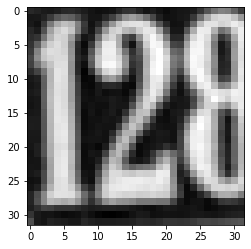

In [9]:
# show first number in the train dataset
print("Label: {}".format(y_train[0]))
plt.imshow(X_train[0], cmap='gray')

Label: 0


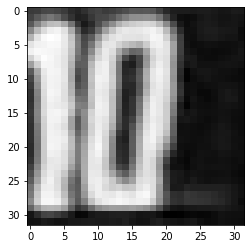

In [10]:
# show first number in the validation dataset
print("Label: {}".format(y_val[0]))
plt.imshow(X_val[0], cmap='gray')

Label: 1


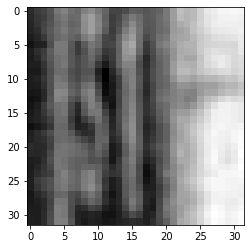

In [11]:
# show first number in the test dataset
print("Label: {}".format(y_test[0]))
plt.imshow(X_test[0], cmap='gray')

### Data Pre-processing

##### Normalize features

In [12]:
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_val /= 255
X_test /= 255

##### Reshape features

In [13]:
# reshaping X data: (n, 32, 32) => (n, 1024)
X_train = X_train.reshape((X_train.shape[0], -1))
X_val = X_val.reshape((X_val.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [14]:
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

print("Images in X_train:", X_train.shape[0])
print("Images in X_val:", X_val.shape[0])
print("Images in X_test:", X_test.shape[0])

print("Max value in X_train:", X_train.max())
print("Min value in X_train:", X_train.min())
print("Max value in X_val:", X_val.max())
print("Min value in X_val:", X_val.min())
print("Max value in X_test:", X_test.max())
print("Min value in X_test:", X_test.min())

(42000, 1024) (60000, 1024) (18000, 1024) (42000,) (60000,) (18000,)
Images in X_train: 42000
Images in X_val: 60000
Images in X_test: 18000
Max value in X_train: 0.9999
Min value in X_train: 0.0
Max value in X_val: 0.9999
Min value in X_val: 0.0
Max value in X_test: 0.9999
Min value in X_test: 0.0


## One-hot encode the class vector

In [15]:
print("Value of first number in training set before encoding :", y_train[10])
print("Value of first number in validation set before encoding:", y_val[10])
print("Value of first number in testing set before encoding:", y_test[10])
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("Shape of y_train:", y_train.shape)
print("One hot encoded value of y_train first number:", y_train[10])
print("Shape of y_val:", y_val.shape)
print("One hot encoded value of y_val first number:", y_val[10])
print("Shape of y_test:", y_test.shape)
print("One hot encoded value of y_test first number:", y_test[10])

Value of first number in training set before encoding : 1
Value of first number in validation set before encoding: 0
Value of first number in testing set before encoding: 8
Shape of y_train: (42000, 10)
One hot encoded value of y_train first number: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Shape of y_val: (60000, 10)
One hot encoded value of y_val first number: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Shape of y_test: (18000, 10)
One hot encoded value of y_test first number: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


## Scaling data for better performance

In [16]:
# Scalaing
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.fit_transform(X_val)
X_test = sc.fit_transform(X_test)

label for each of the below image: 2
label for each of the below image: 6
label for each of the below image: 7
label for each of the below image: 4
label for each of the below image: 4
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 7
label for each of the below image: 3


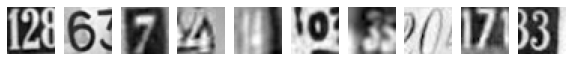

In [17]:
# visualizing the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % (np.argmax(y_train[0:10][i])))
plt.show()

## Implement and apply a deep neural network classifier

#### Feedforward Neural Network

In [18]:
  model = Sequential()
  model.add(Dense(128, input_shape = (1024, )))
  model.add(Activation('sigmoid'))
  model.add(Dense(128, activation="sigmoid"))
  model.add(Dense(10, activation="softmax"))

In [19]:
sgd = optimizers.SGD(lr = 0.001)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               131200    
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 149,002
Trainable params: 149,002
Non-trainable params: 0
_________________________________________________________________


In [21]:
model_fit = model.fit(X_train, y_train, batch_size=200, epochs = 20, verbose = 1)

Epoch 1/20
210/210 [==============================] - 1s 3ms/step - loss: 2.4001 - accuracy: 0.1008
Epoch 2/20
210/210 [==============================] - 1s 3ms/step - loss: 2.3223 - accuracy: 0.1001
Epoch 3/20
210/210 [==============================] - 1s 3ms/step - loss: 2.3081 - accuracy: 0.0978
Epoch 4/20
210/210 [==============================] - 1s 3ms/step - loss: 2.3051 - accuracy: 0.0965
Epoch 5/20
210/210 [==============================] - 1s 3ms/step - loss: 2.3045 - accuracy: 0.0976
Epoch 6/20
210/210 [==============================] - 1s 3ms/step - loss: 2.3042 - accuracy: 0.1006
Epoch 7/20
210/210 [==============================] - 1s 3ms/step - loss: 2.3041 - accuracy: 0.1015
Epoch 8/20
210/210 [==============================] - 1s 3ms/step - loss: 2.3040 - accuracy: 0.1015
Epoch 9/20
210/210 [==============================] - 1s 3ms/step - loss: 2.3039 - accuracy: 0.1017
Epoch 10/20
210/210 [==============================] - 1s 3ms/step - loss: 2.3039 - accuracy: 0.1017

In [22]:
model.evaluate(X_val, y_val)

1875/1875 [==============================] - 4s 2ms/step - loss: 2.3032 - accuracy: 0.1049


[2.3032259941101074, 0.10490000247955322]

With just Feedforward Neural Network and having Activation function as Sigmoid with Learning Rate 0.01 accuracy is very low 10% only and loss is also high 2.3


### Weight Initialization

In [23]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(128, input_shape = (1024, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(128, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))

    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [24]:
model = mlp_model()
model_fit = model.fit(X_train, y_train, batch_size=200, epochs = 20, verbose = 1)

Epoch 1/20
210/210 [==============================] - 1s 3ms/step - loss: 2.4440 - accuracy: 0.1019
Epoch 2/20
210/210 [==============================] - 1s 3ms/step - loss: 2.3465 - accuracy: 0.1055
Epoch 3/20
210/210 [==============================] - 1s 3ms/step - loss: 2.3176 - accuracy: 0.1091
Epoch 4/20
210/210 [==============================] - 1s 3ms/step - loss: 2.3094 - accuracy: 0.1120
Epoch 5/20
210/210 [==============================] - 1s 3ms/step - loss: 2.3072 - accuracy: 0.1085
Epoch 6/20
210/210 [==============================] - 1s 3ms/step - loss: 2.3063 - accuracy: 0.1078
Epoch 7/20
210/210 [==============================] - 1s 3ms/step - loss: 2.3058 - accuracy: 0.1082
Epoch 8/20
210/210 [==============================] - 1s 3ms/step - loss: 2.3054 - accuracy: 0.1081
Epoch 9/20
210/210 [==============================] - 1s 3ms/step - loss: 2.3050 - accuracy: 0.1078
Epoch 10/20
210/210 [==============================] - 1s 3ms/step - loss: 2.3047 - accuracy: 0.1093

In [25]:
model.evaluate(X_val, y_val)

1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.1110


[2.302651882171631, 0.11103333532810211]

With just Feedforward Neural Network and having Activation function as Sigmoid with Learning Rate 0.01 accuracy is very low 11% only and loss is also high 2.3. This is because Sigmoid function suffers from gradient vanishing problem, making training slower.

## Apply ReLU (Rectified Linear Unit)

In [26]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(128, input_shape = (1024, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(128, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))

    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [27]:
model = mlp_model()

model_fit = model.fit(X_train, y_train, batch_size=200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 1s 3ms/step - loss: 2.5495 - accuracy: 0.1121
Epoch 2/100
210/210 [==============================] - 1s 3ms/step - loss: 2.3641 - accuracy: 0.1379
Epoch 3/100
210/210 [==============================] - 1s 3ms/step - loss: 2.2904 - accuracy: 0.1662
Epoch 4/100
210/210 [==============================] - 1s 3ms/step - loss: 2.2341 - accuracy: 0.1927
Epoch 5/100
210/210 [==============================] - 1s 3ms/step - loss: 2.1848 - accuracy: 0.2201
Epoch 6/100
210/210 [==============================] - 1s 3ms/step - loss: 2.1392 - accuracy: 0.2458
Epoch 7/100
210/210 [==============================] - 1s 3ms/step - loss: 2.0949 - accuracy: 0.2712
Epoch 8/100
210/210 [==============================] - 1s 3ms/step - loss: 2.0509 - accuracy: 0.2962
Epoch 9/100
210/210 [==============================] - 1s 3ms/step - loss: 2.0072 - accuracy: 0.3202
Epoch 10/100
210/210 [==============================] - 1s 3ms/step - loss: 1.9634 - accura

In [28]:
results = model.evaluate(X_val, y_val)
print('Val_acc using simple NN SGD : ', results[1])

1875/1875 [==============================] - 4s 2ms/step - loss: 0.8385 - accuracy: 0.7570
Val_acc using simple NN SGD :  0.7569500207901001


In [29]:
#Store the accuracy results for each model in a dataframe for final comparison
results_on_val = pd.DataFrame({'Method':['NN SDG'], 'accuracy': results[1]},index={'1'})
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN SDG,0.75695


Great improvement in training the model with Nonlinearity Activation function ReLU. Even though we didn't change the Learning Rate 0.001. The accuracy bumped up significantly and loss is also reduced derastically using ReLU.

## Implement Batch Normalization for training the neural network

In [30]:
#Batch normalization layer is inserted after dense/convolution and before nonlinearity
def mlp_model():
    model = Sequential()
    
    model.add(Dense(128, input_shape = (1024, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(BatchNormalization()) 
    model.add(Activation('relu'))    
    model.add(Dense(128, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(BatchNormalization()) 
    model.add(Activation('relu'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))

    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [31]:
model = mlp_model()
model_fit = model.fit(X_train, y_train, batch_size=200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 1s 4ms/step - loss: 2.5678 - accuracy: 0.1159
Epoch 2/100
210/210 [==============================] - 1s 4ms/step - loss: 2.4154 - accuracy: 0.1400
Epoch 3/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3295 - accuracy: 0.1625
Epoch 4/100
210/210 [==============================] - 1s 4ms/step - loss: 2.2664 - accuracy: 0.1853
Epoch 5/100
210/210 [==============================] - 1s 4ms/step - loss: 2.2148 - accuracy: 0.2065
Epoch 6/100
210/210 [==============================] - 1s 4ms/step - loss: 2.1705 - accuracy: 0.2291
Epoch 7/100
210/210 [==============================] - 1s 4ms/step - loss: 2.1295 - accuracy: 0.2479
Epoch 8/100
210/210 [==============================] - 1s 4ms/step - loss: 2.0893 - accuracy: 0.2698
Epoch 9/100
210/210 [==============================] - 1s 4ms/step - loss: 2.0519 - accuracy: 0.2905
Epoch 10/100
210/210 [==============================] - 1s 4ms/step - loss: 2.0162 - accura

In [32]:
results = model.evaluate(X_val, y_val)
print('Val_acc using NN SGD (Batch Normalization) : ', results[1])

1875/1875 [==============================] - 5s 3ms/step - loss: 0.8615 - accuracy: 0.7570
Val_acc using NN SGD (Batch Normalization) :  0.7569666504859924


In [33]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN SGD (Batch Normalization)'], 'accuracy': [results[1]]},index={'2'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN SDG,0.756950
2,NN SGD (Batch Normalization),0.756967


#### Using ADAM Optimizer inplace of SGD

In [34]:
#Batch normalization layer is inserted after dense/convolution and before nonlinearity
def mlp_model():
    model = Sequential()
    
    model.add(Dense(128, input_shape = (1024, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(BatchNormalization()) 
    model.add(Activation('relu'))    
    model.add(Dense(128, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(BatchNormalization()) 
    model.add(Activation('relu'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [35]:
model = mlp_model()
model_fit = model.fit(X_train, y_train, batch_size=200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 1s 4ms/step - loss: 1.3926 - accuracy: 0.5661
Epoch 2/100
210/210 [==============================] - 1s 4ms/step - loss: 0.8859 - accuracy: 0.7315
Epoch 3/100
210/210 [==============================] - 1s 4ms/step - loss: 0.7505 - accuracy: 0.7697
Epoch 4/100
210/210 [==============================] - 1s 4ms/step - loss: 0.6674 - accuracy: 0.7965
Epoch 5/100
210/210 [==============================] - 1s 4ms/step - loss: 0.6158 - accuracy: 0.8100
Epoch 6/100
210/210 [==============================] - 1s 4ms/step - loss: 0.5712 - accuracy: 0.8253
Epoch 7/100
210/210 [==============================] - 1s 4ms/step - loss: 0.5384 - accuracy: 0.8325
Epoch 8/100
210/210 [==============================] - 1s 4ms/step - loss: 0.5133 - accuracy: 0.8393
Epoch 9/100
210/210 [==============================] - 1s 4ms/step - loss: 0.4943 - accuracy: 0.8463
Epoch 10/100
210/210 [==============================] - 1s 4ms/step - loss: 0.4764 - accura

In [36]:
results = model.evaluate(X_val, y_val)
print('Val_acc using NN ADAM (Batch Normalization) : ', results[1])

1875/1875 [==============================] - 5s 3ms/step - loss: 0.2905 - accuracy: 0.9395
Val_acc using NN ADAM (Batch Normalization) :  0.9394999742507935


In [37]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN ADAM (Batch Normalization)'], 'accuracy': [results[1]]},index={'3'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN SDG,0.756950
2,NN SGD (Batch Normalization),0.756967
3,NN ADAM (Batch Normalization),0.939500


## Hyper parameter tuning

In [38]:
#Create Model
def train_and_test_loop(ir, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = ir
    learning_rate = lr
    hidden_nodes = 128
    output_nodes = 10

    model = Sequential()
    
    model.add(Dense(hidden_nodes, input_shape = (1024, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(BatchNormalization()) 
    model.add(Activation('relu'))    
    model.add(Dense(hidden_nodes, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(BatchNormalization()) 
    model.add(Activation('relu'))    
    model.add(Dense(output_nodes, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    # Compile model
    adam = optimizers.Adam(lr=learning_rate, decay=1e-6)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=200, verbose= 1)
    score = model.evaluate(X_val, y_val)
    
    return score

In [39]:
import math
for k in range(1,5):
    ir = 100
    lr = math.pow(10, np.random.uniform(-4.0, -2.0))
    Lambda = math.pow(10, np.random.uniform(-6,-4))
    best_acc = train_and_test_loop(ir, lr, Lambda, False)
    print("Try {0}/{1}: Best_Training_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, ir, best_acc, lr, Lambda))

Epoch 1/100
210/210 [==============================] - 1s 5ms/step - loss: 2.0664 - accuracy: 0.2912
Epoch 2/100
210/210 [==============================] - 1s 4ms/step - loss: 1.4984 - accuracy: 0.5589
Epoch 3/100
210/210 [==============================] - 1s 4ms/step - loss: 1.2287 - accuracy: 0.6572
Epoch 4/100
210/210 [==============================] - 1s 4ms/step - loss: 1.0775 - accuracy: 0.6959
Epoch 5/100
210/210 [==============================] - 1s 4ms/step - loss: 0.9769 - accuracy: 0.7229
Epoch 6/100
210/210 [==============================] - 1s 4ms/step - loss: 0.9051 - accuracy: 0.7415
Epoch 7/100
210/210 [==============================] - 1s 4ms/step - loss: 0.8475 - accuracy: 0.7559
Epoch 8/100
210/210 [==============================] - 1s 4ms/step - loss: 0.7974 - accuracy: 0.7674
Epoch 9/100
210/210 [==============================] - 1s 5ms/step - loss: 0.7576 - accuracy: 0.7776
Epoch 10/100
210/210 [==============================] - 1s 4ms/step - loss: 0.7203 - accura

As from above, Case 4 yields best accuracy when Learning rate = 0.0036 and Lamda = 1.29e-6

In [40]:
import math
for k in range(1,5):
    ir=100
    lr = math.pow(10, np.random.uniform(-4.0, -2.0))
    Lambda = math.pow(10, np.random.uniform(-4,-2))
    best_acc = train_and_test_loop(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, ir, best_acc, lr, Lambda))

Epoch 1/100
210/210 [==============================] - 1s 4ms/step - loss: 2.1187 - accuracy: 0.2669
Epoch 2/100
210/210 [==============================] - 1s 4ms/step - loss: 1.5392 - accuracy: 0.5411
Epoch 3/100
210/210 [==============================] - 1s 4ms/step - loss: 1.2619 - accuracy: 0.6424
Epoch 4/100
210/210 [==============================] - 1s 4ms/step - loss: 1.1037 - accuracy: 0.6905
Epoch 5/100
210/210 [==============================] - 1s 4ms/step - loss: 1.0011 - accuracy: 0.7160
Epoch 6/100
210/210 [==============================] - 1s 4ms/step - loss: 0.9263 - accuracy: 0.7349
Epoch 7/100
210/210 [==============================] - 1s 4ms/step - loss: 0.8630 - accuracy: 0.7520
Epoch 8/100
210/210 [==============================] - 1s 5ms/step - loss: 0.8145 - accuracy: 0.7648
Epoch 9/100
210/210 [==============================] - 1s 4ms/step - loss: 0.7729 - accuracy: 0.7754
Epoch 10/100
210/210 [==============================] - 1s 4ms/step - loss: 0.7341 - accura

# Final Model

In [41]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(128, input_shape = (1024, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(BatchNormalization()) 
    model.add(Activation('relu'))    
    model.add(Dense(128, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(BatchNormalization()) 
    model.add(Activation('relu'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr=1e-4, decay=1e-4)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [42]:
    # Fit the model
    model.fit(X_train, y_train, epochs=100, batch_size=200, verbose= 1)
    score = model.evaluate(X_val, y_val)

Epoch 1/100
210/210 [==============================] - 1s 4ms/step - loss: 0.1164 - accuracy: 0.9607
Epoch 2/100
210/210 [==============================] - 1s 4ms/step - loss: 0.1172 - accuracy: 0.9600
Epoch 3/100
210/210 [==============================] - 1s 4ms/step - loss: 0.1067 - accuracy: 0.9640
Epoch 4/100
210/210 [==============================] - 1s 4ms/step - loss: 0.1090 - accuracy: 0.9627
Epoch 5/100
210/210 [==============================] - 1s 4ms/step - loss: 0.1068 - accuracy: 0.9649
Epoch 6/100
210/210 [==============================] - 1s 4ms/step - loss: 0.1057 - accuracy: 0.9651
Epoch 7/100
210/210 [==============================] - 1s 4ms/step - loss: 0.1013 - accuracy: 0.9669
Epoch 8/100
210/210 [==============================] - 1s 4ms/step - loss: 0.1004 - accuracy: 0.9665
Epoch 9/100
210/210 [==============================] - 1s 4ms/step - loss: 0.1142 - accuracy: 0.9621
Epoch 10/100
210/210 [==============================] - 1s 4ms/step - loss: 0.1092 - accura

In [43]:
results = model.evaluate(X_val, y_val)
print('Val_acc using NN Batch ADAM (Hyperparameters) : ', results[1])

1875/1875 [==============================] - 5s 3ms/step - loss: 0.3267 - accuracy: 0.9489
Val_acc using NN Batch ADAM (Hyperparameters) :  0.9489166736602783


In [44]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN Batch ADAM (Hyperparameters)'], 'accuracy': [results[1]]},index={'4'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN SDG,0.756950
2,NN SGD (Batch Normalization),0.756967
3,NN ADAM (Batch Normalization),0.939500
4,NN Batch ADAM (Hyperparameters),0.948917


So the best accuracy comes to 85% where learning rate is 1e-4

# Include Dropout to avoid overfit

In [45]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(128, input_shape = (1024, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(BatchNormalization()) 
    model.add(Activation('relu'))
    model.add(Dropout(0.2))  
    model.add(Dense(128, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(BatchNormalization()) 
    model.add(Activation('relu'))
    model.add(Dropout(0.2)) 
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr=1e-4, decay=1e-4)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [46]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               131200    
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
activation_10 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
_________________________________________________________________
activation_11 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)               

In [47]:
    # Fit the model
    model.fit(X_train, y_train, epochs=100, batch_size=200, verbose= 1)

Epoch 1/100
210/210 [==============================] - 1s 4ms/step - loss: 0.0561 - accuracy: 0.9813
Epoch 2/100
210/210 [==============================] - 1s 4ms/step - loss: 0.0600 - accuracy: 0.9805
Epoch 3/100
210/210 [==============================] - 1s 4ms/step - loss: 0.0672 - accuracy: 0.9775
Epoch 4/100
210/210 [==============================] - 1s 4ms/step - loss: 0.0617 - accuracy: 0.9784
Epoch 5/100
210/210 [==============================] - 1s 4ms/step - loss: 0.0655 - accuracy: 0.9772
Epoch 6/100
210/210 [==============================] - 1s 4ms/step - loss: 0.0565 - accuracy: 0.9811
Epoch 7/100
210/210 [==============================] - 1s 4ms/step - loss: 0.0639 - accuracy: 0.9791
Epoch 8/100
210/210 [==============================] - 1s 4ms/step - loss: 0.0556 - accuracy: 0.9807
Epoch 9/100
210/210 [==============================] - 1s 4ms/step - loss: 0.0569 - accuracy: 0.9807
Epoch 10/100
210/210 [==============================] - 1s 4ms/step - loss: 0.0641 - accura

In [48]:
results = model.evaluate(X_val, y_val)
print('Val_acc using NN Batch ADAM (Dropout) : ', results[1])

1875/1875 [==============================] - 5s 3ms/step - loss: 0.3719 - accuracy: 0.9492
Val_acc using NN Batch ADAM (Dropout) :  0.9491999745368958


In [49]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN Batch ADAM (Dropout)'], 'accuracy': [results[1]]},index={'5'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN SDG,0.756950
2,NN SGD (Batch Normalization),0.756967
3,NN ADAM (Batch Normalization),0.939500
4,NN Batch ADAM (Hyperparameters),0.948917
5,NN Batch ADAM (Dropout),0.949200


## Evaluation - Using the Testing Data Set

In [50]:
results = model.evaluate(X_test, y_test)
print('Val_acc using NN Batch ADAM Dropout(Test_Data) : ', results[1])

563/563 [==============================] - 2s 3ms/step - loss: 1.1956 - accuracy: 0.8426
Val_acc using NN Batch ADAM Dropout(Test_Data) :  0.8426111340522766


In [51]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN Batch ADAM Dropout(Test_Data)'], 'accuracy': [results[1]]},index={'6'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN SDG,0.756950
2,NN SGD (Batch Normalization),0.756967
3,NN ADAM (Batch Normalization),0.939500
4,NN Batch ADAM (Hyperparameters),0.948917
5,NN Batch ADAM (Dropout),0.949200
6,NN Batch ADAM Dropout(Test_Data),0.842611


# Predicting Images using Testing Data Set

In [52]:
#Predicting for all images
y_pred=model.predict_classes(X_test)
print(y_pred)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[1 7 2 ... 7 9 2]


#### Image 1

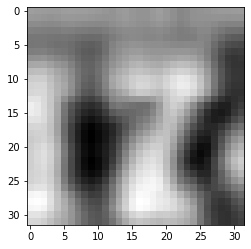

In [53]:
#Showing the image
plt.imshow(X_test[1].reshape(32,32),cmap='gray')

In [54]:
#Predicting the digits
y_pred[1]

7

#### Image 2

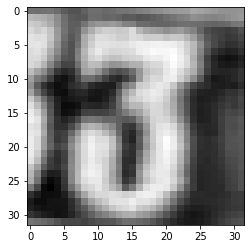

In [55]:
#Showing the image
plt.imshow(X_test[12000].reshape(32,32),cmap='gray')

In [56]:
#Predicting the digits
y_pred[12000]

3

#### Image 3

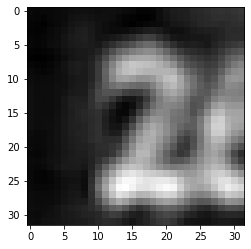

In [57]:
#Showing the image
plt.imshow(X_test[17999].reshape(32,32),cmap='gray')

In [58]:
#Predicting the digits
y_pred[17999]

2

#### Image 4

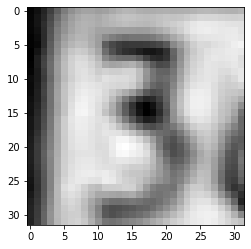

In [59]:
#Showing the image
plt.imshow(X_test[3000].reshape(32,32),cmap='gray')

In [60]:
#Predicting the digits
y_pred[3000]

3

## Confusion matrix demonstrating the accuracy of the classifier

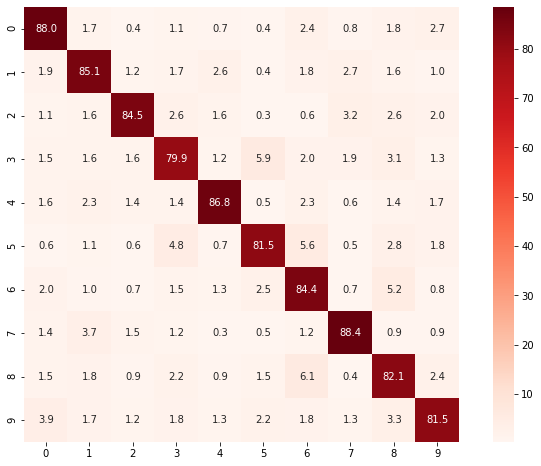

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 8))

# Calculate the confusion matrix
cm = confusion_matrix(y_true=np.argmax(y_test, axis=1), y_pred=y_pred)

# Normalize the confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100.0

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap='Reds', fmt='.1f', square=True);

## Classification Report demonstrating the accuracy of the classifier

In [62]:
print(classification_report(y_true=np.argmax(y_test, axis=1), y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1814
           1       0.84      0.85      0.85      1828
           2       0.90      0.85      0.87      1803
           3       0.81      0.80      0.80      1719
           4       0.89      0.87      0.88      1812
           5       0.85      0.82      0.83      1768
           6       0.78      0.84      0.81      1832
           7       0.88      0.88      0.88      1808
           8       0.79      0.82      0.80      1812
           9       0.85      0.82      0.83      1804

    accuracy                           0.84     18000
   macro avg       0.84      0.84      0.84     18000
weighted avg       0.84      0.84      0.84     18000



# Conclusion

* Neural Network model was trained with the Street View House Numbers (SVHN) Dataset.

* Started with Simple Feed Forward Neural Network with Sigmoid and Optimizer as Stochastic Gradient Descent (SGD) with initialization weight which gave really low accuracy and high loss in training data.

* Moved to RELU  and then with optimizer as ADAM which bumped up the accuracy and also reduced the loss.

* Then tries with many hyperparameters(Hidden Layers, Hidden Units,learning Rate, Number of Epochs, activations Functions).

* Using Deep Deural Betwork with Batch Normalization, hyper parameter tuning and 20% dropout  This resulted a tremendous improvement and finally got 85% accuracy on validation data and close to 80% accuracy on the Testing data set.

* The predicting of the images from the testing data set depitcs the images correctly.

* Classification report and Confusion matrix depicts clearly that single digit from SVHN is predicted with pretty high accuracy using the final model. 

### Thank you